# US Equity Network Graph

In [1]:
import json
import os

In [10]:
os.chdir('columbiadatasciencehackathon')

In [11]:
with open('pr.json') as d:
    pr = json.load(d)

In [13]:
import networkx as nx
%matplotlib inline

In [14]:
G = [nx.Graph() for i in xrange(20)]
for i in xrange(20):
    G[i].add_edges_from(pr[i])

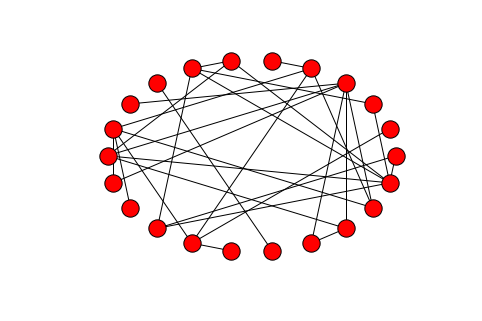

In [15]:
nx.draw_circular(G[18])

In [16]:
import plotly.plotly as py
from plotly.graph_objs import *

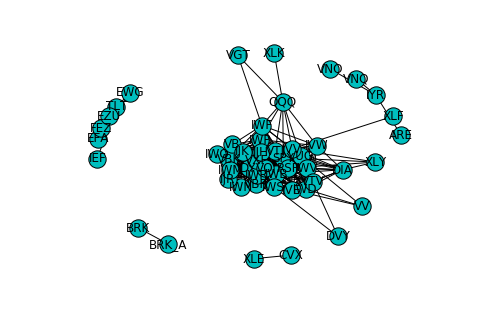

In [17]:
fig = nx.draw(G[15], node_color='c',edge_color='k', with_labels=True)

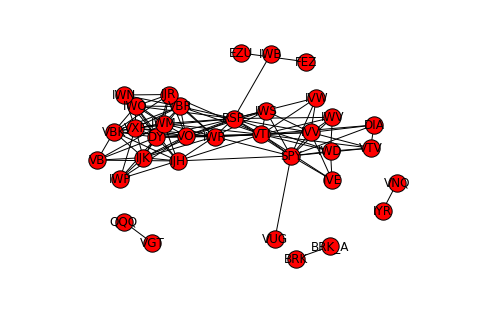

In [18]:
nx.draw_spring(G[17], with_labels=True)

In [19]:
G_level = 6

In [33]:
pos1=nx.spring_layout(G[G_level])

In [32]:
pos2=nx.spectral_layout(G[G_level])

In [31]:
pos3=nx.spring_layout(G[G_level])

In [23]:
import plotly.plotly as py
from plotly.graph_objs import *

In [24]:
def scatter_nodes(pos, labels=None, color=None, size=20, opacity=0.5):
    # pos is the dict of node positions
    # labels is a list  of labels of len(pos), to be displayed when hovering the mouse over the nodes
    # color is the color for nodes. When it is set as None the Plotly default color is used
    # size is the size of the dots representing the nodes
    #opacity is a value between [0,1] defining the node color opacity
    L=len(pos)
    trace = Scatter(x=[], y=[],  mode='markers', marker=Marker(size=[]))
    for k in pos.keys():
        trace['x'].append(pos[k][0])
        trace['y'].append(pos[k][1])
    attrib=dict(name='', text=labels , hoverinfo='text', opacity=opacity) # a dict of Plotly node attributes
    trace=dict(trace, **attrib)# concatenate the dict trace and attrib
    trace['marker']['size']=size
    trace['marker']['color']=color
    return trace

In [25]:
def scatter_edges(G, pos, line_color=None, line_width=1):
    trace = Scatter(x=[], y=[], mode='lines')
    for edge in G.edges():
        trace['x'] += [pos[edge[0]][0],pos[edge[1]][0], None]
        trace['y'] += [pos[edge[0]][1],pos[edge[1]][1], None]  
        trace['hoverinfo']='none'
        trace['line']['width']=line_width
        if line_color is not None: # when it is None a default Plotly color is used
            trace['line']['color']=line_color
    return trace

In [26]:
pos=nx.fruchterman_reingold_layout(G[G_level])

In [27]:
labels=[str(k) for k in range(len(pos))] # labels are  set as being the nodes indices in the list of nodes
trace1=scatter_edges(G[G_level], pos, line_color='rgb(189,189,189)')
trace2=scatter_nodes(pos, labels=labels, color='rgb(49,130,189)', size=30)

In [28]:
width=800
height=640
axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title='' 
          )
layout=Layout(title= 'U.S. Equities Correlation Network',  #
    font= Font(),
    showlegend=False,
    autosize=False,
    width=width,
    height=height,
    xaxis=XAxis(axis),
    yaxis=YAxis(axis),
    margin=Margin(
        l=40,
        r=40,
        b=85,
        t=100,
        pad=0,
       
    ),
    hovermode='closest',
    plot_bgcolor='#ffffff', #set background color            
    )


data=Data([trace1, trace2])

fig = Figure(data=data, layout=layout)

In [29]:
def make_annotations(pos, text, font_size=14, font_color='rgb(25,25,25)'):
    L=len(pos)
    if len(text)!=L:
        raise ValueError('The lists pos and text must have the same len')
    annotations = Annotations()
    for k in pos.keys():
        annotations.append(
            Annotation(
                text=k, 
                x=pos[k][0], y=pos[k][1],
                xref='x1', yref='y1',
                font=dict(color= font_color, size=font_size),
                showarrow=False)
        )
    return annotations 

In [30]:
fig['layout'].update(annotations=make_annotations(pos, [str(k) for k in range(len(pos))]))  
#py.sign_in('', '')
py.image.save_as(fig, filename= str(G_level)+'.png')
py.iplot(fig, filename='tst')